In [141]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from pprint import pprint as pp
import time
%matplotlib inline

(188, 300, 3)
[152 104  70]


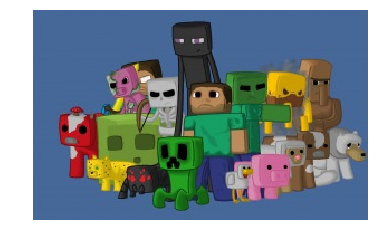

In [222]:
img = cv2.imread('./2.jpg')

print img.shape
print img[0,0]

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(0)
plt.axis("off")
plt.imshow(img)
plt.show()

In [223]:
image_vector = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
print image_vector.shape

(56400, 3)


In [224]:
start = time.time()
clf = KMeans(n_clusters=10)
clf.fit(image_vector)
print time.time()-start

1.71245312691


(56400,)
[[185 153 106]
 [151 176 198]
 [ 46  82 237]
 [ 71  81  78]
 [219 146 217]
 [130 117 192]
 [218 216 216]
 [ 87 133 125]
 [231 104 159]
 [ 94 234 227]]


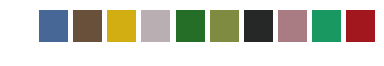

In [225]:
colors = 255-clf.cluster_centers_.astype("uint8")
labels = clf.labels_

print labels.shape
print colors
plt.figure(0)
for cols in range(colors.shape[0]):
    cl = np.zeros((1000,900, 3))
    cl[:, :, :] = colors[cols]
    plt.subplot(1, 10, cols+1)
    plt.axis("off")
    plt.imshow(cl)
plt.show()

(56400, 3)


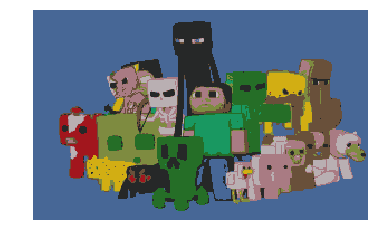

In [226]:
new_img = np.zeros(image_vector.shape)
print new_img.shape

for ix in range(image_vector.shape[0]):
    new_img[ix, :] = colors[clf.labels_[ix]]

new_img = new_img.reshape(img.shape)

plt.figure(0)
plt.imshow(new_img)
plt.axis('off')
plt.show()

In [227]:
label,hist = np.unique(labels,return_counts=True)
print label
print hist

[0 1 2 3 4 5 6 7 8 9]
[29235  4286  1706  2389  4400  2979  5165  3846  1325  1069]


In [228]:
# Each Cluster 
    # label
    # center
    # probablity
    # total_points
clusters = []
for ix in range(colors.shape[0]):
    lab = label[ix]
    points = hist[ix]
    center = colors[ix]
    prob = float(points)/hist.sum()
    clusters.append([lab,points,center,prob])
clusters = sorted(clusters, key= lambda x:x[3])
pp(clusters)

[[9, 1069, array([ 94, 234, 227], dtype=uint8), 0.01895390070921986],
 [8, 1325, array([231, 104, 159], dtype=uint8), 0.02349290780141844],
 [2, 1706, array([ 46,  82, 237], dtype=uint8), 0.03024822695035461],
 [3, 2389, array([71, 81, 78], dtype=uint8), 0.042358156028368794],
 [5, 2979, array([130, 117, 192], dtype=uint8), 0.052819148936170214],
 [7, 3846, array([ 87, 133, 125], dtype=uint8), 0.06819148936170213],
 [1, 4286, array([151, 176, 198], dtype=uint8), 0.07599290780141844],
 [4, 4400, array([219, 146, 217], dtype=uint8), 0.07801418439716312],
 [6, 5165, array([218, 216, 216], dtype=uint8), 0.09157801418439716],
 [0, 29235, array([185, 153, 106], dtype=uint8), 0.5183510638297872]]


# Top 10 Dominant Color in the Image 

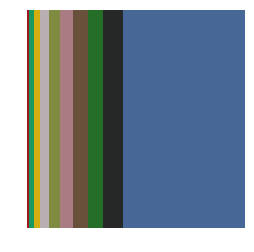

In [234]:
top_domi_colors = np.zeros((100,100,3))

start = 0
for ix in range(len(clusters)):
    end = int(start + top_domi_colors.shape[1]*clusters[ix][3])
    top_domi_colors[:,start:end] = clusters[ix][2]
    start = end
    
# due to some errors
top_domi_colors[:,end:] = clusters[len(clusters)-1][2]

plt.figure(0)
plt.imshow(top_domi_colors)
plt.axis("off")
plt.show()

# Most Dominant Color in the Image

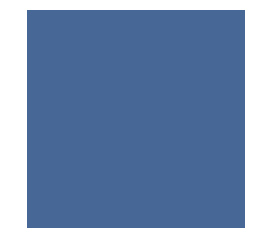

In [237]:
domi_color = np.zeros((100,100,3))
domi_color[:,:] = clusters[len(clusters)-1][2] 

plt.figure(1)
plt.imshow(domi_color)
plt.axis("off")
plt.show()